# Starting Out With Bokeh

## One Variable Plotting

In [29]:
# Pandas for data manipulation
import pandas as pd
import numpy as np

## Basic Glyphs

In [30]:

# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]

circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)

# Circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')


# Set to output the plot in the notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

## Data Inspection

In [31]:
flight = pd.read_csv('../../data/flights.csv', index_col=0)
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


### Summary Statistics
We are going to focus on a single variable, in this case the arrival delay in minutes. Before we get into plotting, we will want to take a look at the summary statistics for the arrival delay.

In [32]:
flight['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [33]:
# Remove na values from flight data
flights = flight.dropna()

## Histogram
First graph will be simple histogram of arrival delay, with all airlines on the same plot

### Data for plotting

In [34]:
# Bins will be five minutes in width, so number of bins is 180/5
# Limit delays to [-60, +120] minutes using the range
arr_hist, edges = np.histogram(flights['arr_delay'], 
                               bins = int(180/5), 
                               range = [-60, 120])

# Put the information in a dataframe
delays = pd.DataFrame({'flights': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [35]:
delays.head()

,flights,left,right
0,276,-60.0,-55.0
1,636,-55.0,-50.0
2,1394,-50.0,-45.0
3,2820,-45.0,-40.0
4,5339,-40.0,-35.0


In [36]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)]', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph
p.quad(bottom=0, top=delays['flights'], 
       left=delays['left'], right=delays['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

## matplotlib equivalent

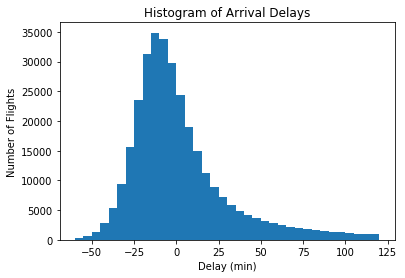

In [26]:
import matplotlib.pyplot as plt
plt.hist(flights['arr_delay'], bins = int(180/5), range = (-60, 120));
plt.xlabel('Delay (min)'); plt.ylabel('Number of Flights')
plt.title('Histogram of Arrival Delays')
plt.show()

## Add basic styling function

In [37]:
# Style function that takes in a plot
def style(p):
    # Title 
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'
    
    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'
    
    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

# Add Aesthetics
styled_p = style(p)

# Show plot
show(styled_p)

## Adding Interactivity
There are easier ways to create a basic histogram in Python, using matplotlib, but Bokeh provides ways to interact with the data

### **Passive Interactions**
(inspectors) are actions which do not alter the data displayed. e.g. the **HoverTool**

### ColumnDataSource

In [17]:
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource

In [38]:
# Formatted columns for Hover Tooltips
delays['f_flights'] = ['%d flights' % count for count in delays['flights']]
delays['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(delays['left'], delays['right'])]

delays.head()

,flights,left,right,f_flights,f_interval
0,276,-60.0,-55.0,276 flights,-60 to -55 minutes
1,636,-55.0,-50.0,636 flights,-55 to -50 minutes
2,1394,-50.0,-45.0,1394 flights,-50 to -45 minutes
3,2820,-45.0,-40.0,2820 flights,-45 to -40 minutes
4,5339,-40.0,-35.0,5339 flights,-40 to -35 minutes


In [39]:
# Convert to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['f_interval', 'index', 'f_flights', 'left', 'flights', 'right'])

### Add in Tooltips on Hover

In [40]:
# Import the hover tool class
from bokeh.models import HoverTool

In [41]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph with source this time
p.quad(bottom=0, top='flights', left='left', right='right', source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                             ('Num of Flights', '@f_flights')])

# Style the plot
p = style(p)

# Add the hover tool to the graph
p.add_tools(hover)

# Show the plot
show(p)